# MLB 연봉 예측 및 분석_이정현

# 크롤링 및 EDA

In [1]:
# 필요한 패키지
import requests
# 데이터 처리
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
# 기타 필요 : 정규식, 시간
import re
import time

!pip install tqdm
import time
from tqdm import tqdm #진행상황 확인 위한 패키지 설치

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


###### 연봉 테이블 가져오기 위한 처리

In [2]:
page = "1"
url = f"https://databases.usatoday.com/mlb-salaries/page/{page}/"
res = requests.get(url)
soup = BeautifulSoup(res.text, "html.parser")
# 요청할 주소를 Full 완성 해야함
# 브라우저의 네트워크 속성에서 숨겨져 있는 주소들을 파악
url = f"https://www.spotrac.com/mlb/rankings/2021/salary/starting-pitcher/"
print(url)
res = requests.get(url)
print(res)
soup = BeautifulSoup(res.text, "html.parser")

https://www.spotrac.com/mlb/rankings/2021/salary/starting-pitcher/
<Response [200]>


In [3]:
# idx번 째 선수 정보 추출
idx = 0

# idx번 째 선수 정보 닫아두기
p_data = soup.find("tbody").find_all("tr")[idx]
p_data

# 선수 이름
p_name = p_data.find_all("a", {"class" : "team-name"})[0].text
print(p_name, type(p_name))

# POS 포지션
p_pos = p_data.find_all("td")[2].text.strip()
print(p_pos, type(p_pos))

# AGE 나이
p_age = p_data.find_all("td")[3].text.strip()
print(p_age, type(p_age))

# Salary 연봉
p_sal = p_data.find_all("td")[4].text.strip()
print(p_sal, type(p_sal))

Gerrit Cole <class 'str'>
SP <class 'str'>
30 <class 'str'>
$36,000,000 <class 'str'>


In [4]:
p_df = pd.DataFrame()
p_df_temp = pd.DataFrame(
    {"Name": "",
     "Pos" : "", "Age" : "", "2021_Salary" : "",
     }, index=["id_data"]
)
p_df_temp

,Name,Pos,Age,2021_Salary
id_data,,,,


# 21, 20년 연봉 테이블을 불러옴

In [5]:
url = f"https://www.spotrac.com/mlb/rankings/2021/salary/starting-pitcher/"
res = requests.get(url)
soup = BeautifulSoup(res.text, "html.parser")

for i in range(len(soup.find("tbody").find_all("tr"))):
    p_data = soup.find("tbody").find_all("tr")[i]
    
    p_df_temp.iat[0, 0] = p_data.find_all("a", {"class" : "team-name"})[0].text
    p_df_temp.iat[0, 1] = p_data.find_all("td")[2].text.strip()
    p_df_temp.iat[0, 2] = p_data.find_all("td")[3].text.strip()
    p_df_temp.iat[0, 3] = p_data.find_all("td")[4].text.strip()

    p_df = pd.concat([p_df,p_df_temp ], ignore_index = True)

    for k in range(len(p_df_temp.columns)):
      p_df_temp.iat[0, k] = ""
p_df.index = p_df.index+1
print(p_df)

url = f"https://www.spotrac.com/mlb/rankings/2022/salary/starting-pitcher/"
res = requests.get(url)
soup = BeautifulSoup(res.text, "html.parser")

for j in range(len(soup.find("tbody").find_all("tr"))):
    x_data = soup.find("tbody").find_all("tr")[j]
    name = x_data.find_all("a", {"class" : "team-name"})[0].text
    sal = x_data.find_all("td")[4].text.strip()
    print(name, sal)

                  Name Pos Age  2021_Salary
1          Gerrit Cole  SP  30  $36,000,000
2         Jacob deGrom  SP  33  $36,000,000
3         Zack Greinke  SP  37  $35,000,000
4    Stephen Strasburg  SP  32  $35,000,000
5         Max Scherzer  SP  36  $34,603,480
..                 ...  ..  ..          ...
96         Tyler Mahle  SP  26   $2,200,000
97   Jordan Montgomery  SP  28   $2,130,000
98       Steven Brault  SP  29   $2,050,000
99    Mike Foltynewicz  SP  29   $2,000,000
100         Jon Lester  SP  37   $2,000,000

[100 rows x 4 columns]
Max Scherzer $43,333,333
Gerrit Cole $36,000,000
Jacob deGrom $36,000,000
Trevor Bauer $35,333,333
Stephen Strasburg $35,000,000
Chris Sale $30,000,000
Zack Wheeler $26,000,000
Justin Verlander $25,000,000
Marcus Stroman $25,000,000
Patrick Corbin $23,416,666
Madison Bumgarner $23,000,000
Carlos Rodon $21,500,000
Kevin Gausman $21,000,000
Robbie Ray $21,000,000
Noah Syndergaard $21,000,000
Yu Darvish $20,000,000
Hyun-Jin Ryu $20,000,000
Charlie

In [6]:
p_df["2022_Salary"] = ""
url = f"https://www.spotrac.com/mlb/rankings/2022/salary/starting-pitcher/"
res = requests.get(url)
soup = BeautifulSoup(res.text, "html.parser")

for i in range(len(soup.find("tbody").find_all("tr"))):
    for j in range(len(soup.find("tbody").find_all("tr"))):
        x_data = soup.find("tbody").find_all("tr")[j]
        name = x_data.find_all("a", {"class" : "team-name"})[0].text

        if p_df.iat[i,0] == name :
            p_df.iat[i,4] = x_data.find_all("td")[4].text.strip()
        else:
            pass
p_df

,Name,Pos,Age,2021_Salary,2022_Salary
1,Gerrit Cole,SP,30,"$36,000,000","$36,000,000"
2,Jacob deGrom,SP,33,"$36,000,000","$36,000,000"
3,Zack Greinke,SP,37,"$35,000,000","$13,000,000"
4,Stephen Strasburg,SP,32,"$35,000,000","$35,000,000"
5,Max Scherzer,SP,36,"$34,603,480","$43,333,333"
...,...,...,...,...,...
96,Tyler Mahle,SP,26,"$2,200,000","$5,200,000"
97,Jordan Montgomery,SP,28,"$2,130,000","$6,000,000"
98,Steven Brault,SP,29,"$2,050,000",
99,Mike Foltynewicz,SP,29,"$2,000,000",


# 선수들의 2021, 2022년도 연봉이 완성된 데이터프레임

# MLB Stats API 사용
## 패키지 설치

In [7]:
# 패키지 설치
!pip install MLB-StatsAPI

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# import 잘 되었는지 확인 하기 위해서 기능 중 하나 실행

In [8]:
import statsapi
print(statsapi.league_leaders("homeRuns", statGroup = "hitting", limit = 10, season = 2022, leagueId = 103))
# 2022시즌 AL 홈런순위 상위 10명 타자

Rank Name                 Team                    Value
 1   Aaron Judge          New York Yankees         62  
 2   Mike Trout           Los Angeles Angels       40  
 3   Yordan Alvarez       Houston Astros           37  
 4   Shohei Ohtani        Los Angeles Angels       34  
 5   Anthony Santander    Baltimore Orioles        33  
 5   Corey Seager         Texas Rangers            33  
 7   Vladimir Guerrero    Toronto Blue Jays        32  
 7   Anthony Rizzo        New York Yankees         32  
 9   Giancarlo Stanton    New York Yankees         31  
 9   Eugenio Suarez       Seattle Mariners         31  



# 빈 리스트에 선수이름 & Stats 담기
## mlb stats API에서 아까 담은 리스트의 이름을 넣어가며 선수 정보를 불러옴

In [10]:
p_name = []
for i in range(len(p_df)):
    p_name.append(p_df.iat[i,0])

# mlb stats API에서 아까 담은 리스트의 이름을 넣어가며 선수 정보를 불러옴
p_stats = []
for _ in tqdm(p_name):
    try:
        p_stats.append(statsapi.player_stats(next(x['id'] for x in statsapi.get('sports_players',{'season':2020,'gameType':'W'})['people'] if x['fullName']==_), 'pitching', 'season').split('\n'))
    except:
        pass

100%|██████████| 100/100 [00:24<00:00,  4.06it/s]

85


# playeer_stats이라는 DF 만듬
# playeer_stats_temp에 뽑고자 하는 stats을 열로 만둘어 줌

In [14]:
player_stats = pd.DataFrame()
player_stats_temp = pd.DataFrame(
    {"wins": "", "losses": "",
     "saves" : "", "holds" : "", "blownSaves" : "",
     "gamesPlayed" : "", "gamesStarted" : "", "inningsPitched" : "",
     "strikeOuts" : "", "baseOnBalls" : "","hits" : "",
     "homeRuns" : "", "era" : ""
    }, index = ['id_data']
)
player_stats_temp

,wins,losses,saves,holds,blownSaves,gamesPlayed,gamesStarted,inningsPitched,strikeOuts,baseOnBalls,hits,homeRuns,era
id_data,,,,,,,,,,,,,


# player_stats_temp에 위에서의 Stats리스트에 담아둔 값을 돌아가며 넣어줌
# 이를 player_stats에 concat으로 넣어줌

In [15]:
for i in range(len(p_stats)):
    for j in range(len(p_stats)):
        try:
            if p_stats[i][j].split(":")[0] == "wins":
                player_stats_temp["wins"] = p_stats[i][j].split(":")[1]
            elif p_stats[i][j].split(":")[0] == "losses":
                player_stats_temp["losses"] = p_stats[i][j].split(":")[1]
            elif p_stats[i][j].split(":")[0] == "saves":
                player_stats_temp["saves"] = p_stats[i][j].split(":")[1]
            elif p_stats[i][j].split(":")[0] == "holds":
                player_stats_temp["holds"] = p_stats[i][j].split(":")[1]
            elif p_stats[i][j].split(":")[0] == "blownSaves":
                player_stats_temp["blownSaves"] = p_stats[i][j].split(":")[1]
            elif p_stats[i][j].split(":")[0] == "gamesPlayed":
                player_stats_temp["gamesPlayed"] = p_stats[i][j].split(":")[1]
            elif p_stats[i][j].split(":")[0] == "gamesStarted":
                player_stats_temp["gamesStarted"] = p_stats[i][j].split(":")[1]
            elif p_stats[i][j].split(":")[0] == "inningsPitched":
                player_stats_temp["inningsPitched"] = p_stats[i][j].split(":")[1]
            elif p_stats[i][j].split(":")[0] == "strikeOuts":
                player_stats_temp["strikeOuts"] = p_stats[i][j].split(":")[1]
            elif p_stats[i][j].split(":")[0] == "baseOnBalls":
                player_stats_temp["baseOnBalls"] = p_stats[i][j].split(":")[1]
            elif p_stats[i][j].split(":")[0] == "hits":
                player_stats_temp["hits"] = p_stats[i][j].split(":")[1]
            elif p_stats[i][j].split(":")[0] == "homeRuns":
                player_stats_temp["homeRuns"] = p_stats[i][j].split(":")[1]
            elif p_stats[i][j].split(":")[0] == "era":
                player_stats_temp["era"] = p_stats[i][j].split(":")[1]
        except:
            pass
    player_stats = pd.concat([player_stats, player_stats_temp ], ignore_index = True)

    for key in range(len(player_stats_temp.columns)):
        player_stats_temp.iat[0, key] = ""
player_stats.index = player_stats.index+1
player_stats

,wins,losses,saves,holds,blownSaves,gamesPlayed,gamesStarted,inningsPitched,strikeOuts,baseOnBalls,hits,homeRuns,era
1,13,8,0,0,0,33,33,200.2,257,50,154,33,3.50
2,5,4,0,0,0,11,11,64.1,102,8,40,9,3.08
3,4,9,0,0,0,26,26,137.0,73,27,157,14,3.68
4,0,1,0,0,0,1,1,4.2,5,2,8,1,13.50
5,11,5,0,0,0,23,23,145.1,173,24,108,13,2.29
...,...,...,...,...,...,...,...,...,...,...,...,...,...
81,6,8,0,0,0,19,19,120.2,114,39,91,12,4.40
82,9,6,0,0,0,11,11,178.1,61,13,56,6,3.48
83,0,0,0,1,1,9,0,9.0,8,5,8,0,3.00
84,,,,,,,,,,,,,


# 기존의 p_df에 위에서 만든 player_stats를 합쳐줌

In [16]:
pitcher = pd.concat([p_df, player_stats], axis = 1)
pitcher

,Name,Pos,Age,2021_Salary,2022_Salary,wins,losses,saves,holds,blownSaves,gamesPlayed,gamesStarted,inningsPitched,strikeOuts,baseOnBalls,hits,homeRuns,era
1,Gerrit Cole,SP,30,"$36,000,000","$36,000,000",13,8,0,0,0,33,33,200.2,257,50,154,33,3.50
2,Jacob deGrom,SP,33,"$36,000,000","$36,000,000",5,4,0,0,0,11,11,64.1,102,8,40,9,3.08
3,Zack Greinke,SP,37,"$35,000,000","$13,000,000",4,9,0,0,0,26,26,137.0,73,27,157,14,3.68
4,Stephen Strasburg,SP,32,"$35,000,000","$35,000,000",0,1,0,0,0,1,1,4.2,5,2,8,1,13.50
5,Max Scherzer,SP,36,"$34,603,480","$43,333,333",11,5,0,0,0,23,23,145.1,173,24,108,13,2.29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,Tyler Mahle,SP,26,"$2,200,000","$5,200,000",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
97,Jordan Montgomery,SP,28,"$2,130,000","$6,000,000",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
98,Steven Brault,SP,29,"$2,050,000",,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
99,Mike Foltynewicz,SP,29,"$2,000,000",,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# 결과에 영향을 줄 수 있기에, 결측값이 있는 행 삭제!

In [17]:
pitcher.replace("", np.nan, inplace = True)
pitcher.dropna(inplace = True)
pitcher

,Name,Pos,Age,2021_Salary,2022_Salary,wins,losses,saves,holds,blownSaves,gamesPlayed,gamesStarted,inningsPitched,strikeOuts,baseOnBalls,hits,homeRuns,era
1,Gerrit Cole,SP,30,"$36,000,000","$36,000,000",13,8,0,0,0,33,33,200.2,257,50,154,33,3.50
2,Jacob deGrom,SP,33,"$36,000,000","$36,000,000",5,4,0,0,0,11,11,64.1,102,8,40,9,3.08
3,Zack Greinke,SP,37,"$35,000,000","$13,000,000",4,9,0,0,0,26,26,137.0,73,27,157,14,3.68
4,Stephen Strasburg,SP,32,"$35,000,000","$35,000,000",0,1,0,0,0,1,1,4.2,5,2,8,1,13.50
5,Max Scherzer,SP,36,"$34,603,480","$43,333,333",11,5,0,0,0,23,23,145.1,173,24,108,13,2.29
6,Justin Verlander,SP,38,"$33,000,000","$25,000,000",18,4,0,0,0,28,28,175.0,185,29,116,12,1.75
8,Trevor Bauer,SP,30,"$31,333,333","$35,333,333",12,3,0,0,0,22,22,126.1,137,23,96,10,2.28
9,Clayton Kershaw,SP,33,"$31,000,000","$17,300,000",6,19,0,0,0,31,31,152.2,128,49,210,27,6.31
10,Chris Sale,SP,32,"$30,000,000","$30,000,000",16,8,0,0,0,30,30,194.2,197,37,148,22,3.10
11,Patrick Corbin,SP,31,"$24,416,666","$23,416,666",12,7,0,0,0,26,26,153.0,163,34,125,13,2.82


# 2021, 2022 연봉 값의 $를 계산을 위해서 없애주고 이상해진 index값 재설정

In [18]:
# 정규표현식이라는 것을 인식시키기 위해 regex=True 를 입력
# pat : 찾고자 하는 문자열(str)이나 정규표현식 입력
# repl : 대체할 값
pitcher["2021_Salary"] = pitcher["2021_Salary"].str.replace(pat = r'$', repl = r'', regex = True)
pitcher["2022_Salary"] = pitcher["2022_Salary"].str.replace(pat = r'$', repl = r'', regex = True)
pitcher.reset_index(inplace = True)
pitcher.index = pitcher.index + 1
pitcher.drop("index", axis = 1, inplace = True)
pitcher

,Name,Pos,Age,2021_Salary,2022_Salary,wins,losses,saves,holds,blownSaves,gamesPlayed,gamesStarted,inningsPitched,strikeOuts,baseOnBalls,hits,homeRuns,era
1,Gerrit Cole,SP,30,"36,000,000","36,000,000",13,8,0,0,0,33,33,200.2,257,50,154,33,3.50
2,Jacob deGrom,SP,33,"36,000,000","36,000,000",5,4,0,0,0,11,11,64.1,102,8,40,9,3.08
3,Zack Greinke,SP,37,"35,000,000","13,000,000",4,9,0,0,0,26,26,137.0,73,27,157,14,3.68
4,Stephen Strasburg,SP,32,"35,000,000","35,000,000",0,1,0,0,0,1,1,4.2,5,2,8,1,13.50
5,Max Scherzer,SP,36,"34,603,480","43,333,333",11,5,0,0,0,23,23,145.1,173,24,108,13,2.29
6,Justin Verlander,SP,38,"33,000,000","25,000,000",18,4,0,0,0,28,28,175.0,185,29,116,12,1.75
7,Trevor Bauer,SP,30,"31,333,333","35,333,333",12,3,0,0,0,22,22,126.1,137,23,96,10,2.28
8,Clayton Kershaw,SP,33,"31,000,000","17,300,000",6,19,0,0,0,31,31,152.2,128,49,210,27,6.31
9,Chris Sale,SP,32,"30,000,000","30,000,000",16,8,0,0,0,30,30,194.2,197,37,148,22,3.10
10,Patrick Corbin,SP,31,"24,416,666","23,416,666",12,7,0,0,0,26,26,153.0,163,34,125,13,2.82


# pitcher의 salary가 "," 때문에 type : str -> int 바꿔줘야함

In [19]:
for i in range(1, len(pitcher["2021_Salary"]) + 1):
    new_sal = pitcher.loc[i,"2021_Salary"].split(",")
    new_sal
    money = ''
    for j in range(len(new_sal)):
        money +=new_sal[j]
    for k in range(1, len(pitcher)+1):
        pitcher.loc[i, "2021_Salary"] = int(money)

# 2022년도 연봉인 y열도 동일처리
for i in range(1, len(pitcher["2022_Salary"]) + 1):
    new_sal = pitcher.loc[i,"2022_Salary"].split(",")
    new_sal
    money = ''
    for j in range(len(new_sal)):
        money +=new_sal[j]
    for k in range(1, len(pitcher)+1):
        pitcher.loc[i, "2022_Salary"] = int(money)
pitcher

,Name,Pos,Age,2021_Salary,2022_Salary,wins,losses,saves,holds,blownSaves,gamesPlayed,gamesStarted,inningsPitched,strikeOuts,baseOnBalls,hits,homeRuns,era
1,Gerrit Cole,SP,30,36000000,36000000,13,8,0,0,0,33,33,200.2,257,50,154,33,3.50
2,Jacob deGrom,SP,33,36000000,36000000,5,4,0,0,0,11,11,64.1,102,8,40,9,3.08
3,Zack Greinke,SP,37,35000000,13000000,4,9,0,0,0,26,26,137.0,73,27,157,14,3.68
4,Stephen Strasburg,SP,32,35000000,35000000,0,1,0,0,0,1,1,4.2,5,2,8,1,13.50
5,Max Scherzer,SP,36,34603480,43333333,11,5,0,0,0,23,23,145.1,173,24,108,13,2.29
6,Justin Verlander,SP,38,33000000,25000000,18,4,0,0,0,28,28,175.0,185,29,116,12,1.75
7,Trevor Bauer,SP,30,31333333,35333333,12,3,0,0,0,22,22,126.1,137,23,96,10,2.28
8,Clayton Kershaw,SP,33,31000000,17300000,6,19,0,0,0,31,31,152.2,128,49,210,27,6.31
9,Chris Sale,SP,32,30000000,30000000,16,8,0,0,0,30,30,194.2,197,37,148,22,3.10
10,Patrick Corbin,SP,31,24416666,23416666,12,7,0,0,0,26,26,153.0,163,34,125,13,2.82


# 시각화

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
# 시각화 전, Salary : int 나머지는 타입이 str이므로 int로 형변환이 필요
pitcher = pitcher.astype({"Name" : "str",
                          "Pos" : "str",
                         "wins": "int",
                         "losses": "int",
                         "saves": "int",
                         "holds": "int",
                         "blownSaves": "int",
                         "gamesPlayed": "int",
                         "gamesStarted": "int",
                         "inningsPitched": "float",
                         "strikeOuts": "int",
                         "baseOnBalls": "int",
                         "hits": "int",
                         "homeRuns": "int",
                         "era": "float",})
this_df = pitcher
this_df.to_csv("original_df.csv", index = False)

# 이번 프로젝트 회귀 분석의 목표 y값 : 투수의 2022연봉

## 2022년 연봉 분포를 출력

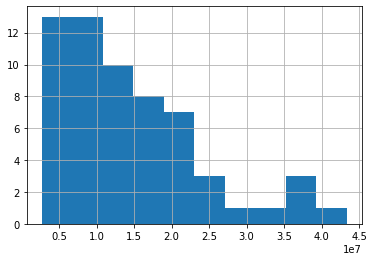

In [21]:
pitcher["2022_Salary"].hist(bins = 10)

### 히스토그램 : 연봉의 분포를 파악 가능

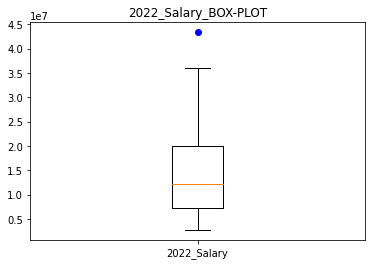

In [22]:
plt.boxplot(pitcher["2022_Salary"], sym = "bo") # outlier 이상치 색깔 푸른색으로 설정
plt.title('2022_Salary_BOX-PLOT')
plt.xticks([1], ['2022_Salary'])
plt.show()

# box plot : 연봉의 일반적인 범주를 파악 가능
# '2500만 달러 이상'을 받는 선수는 별로 많지 않음 -> 250만 달러 미만의 연봉이 일반적으로 보임
# 각각의 피처들은 어떤 특성을 가지고 있을까?

##### 박스 내부의 가로 선(빨간선) : 중앙값
##### 최대값(중앙값 + 1.5 * IQR보다 작은 데이더 중 가장 작은 값), 최소값(중앙값 - 1.5 * IQR보다 큰 데이더 중 가장 작은 값)
##### IQR(4분범위) : 75번째 백분위수와 25번째 백분위수 간의 차이 (3사분위수 - 1사분위수)
##### 박스 위 : 3사 분위수
##### 박스 아래 : 1사 분위수
##### 특이점(outlier) : 최대값보다 크거나 최소값보다 작은 데이터가 해당

In [23]:
num_val = pitcher.drop('Pos', axis=1)
num_val = num_val.drop('Name', axis=1)

## '선수명'이나 '포지션'과 같이 그래프로 표현할 수 없는 것들을 제외

In [24]:
num_val

,Age,2021_Salary,2022_Salary,wins,losses,saves,holds,blownSaves,gamesPlayed,gamesStarted,inningsPitched,strikeOuts,baseOnBalls,hits,homeRuns,era
1,30,36000000,36000000,13,8,0,0,0,33,33,200.2,257,50,154,33,3.50
2,33,36000000,36000000,5,4,0,0,0,11,11,64.1,102,8,40,9,3.08
3,37,35000000,13000000,4,9,0,0,0,26,26,137.0,73,27,157,14,3.68
4,32,35000000,35000000,0,1,0,0,0,1,1,4.2,5,2,8,1,13.50
5,36,34603480,43333333,11,5,0,0,0,23,23,145.1,173,24,108,13,2.29
6,38,33000000,25000000,18,4,0,0,0,28,28,175.0,185,29,116,12,1.75
7,30,31333333,35333333,12,3,0,0,0,22,22,126.1,137,23,96,10,2.28
8,33,31000000,17300000,6,19,0,0,0,31,31,152.2,128,49,210,27,6.31
9,32,30000000,30000000,16,8,0,0,0,30,30,194.2,197,37,148,22,3.10
10,31,24416666,23416666,12,7,0,0,0,26,26,153.0,163,34,125,13,2.82


## 회기 분석에 사용할 것들을 살펴보자

In [25]:
def plot_hist_each_column(num_val):
    plt.rcParams['figure.figsize'] = [20, 16]
    fig = plt.figure(1)
    
    # num_val의 column 갯수 만큼의 subplot을 출력합니다.
    for i in range(len(num_val.columns)):
        ax = fig.add_subplot(4, 4, i+1)
        plt.hist(num_val[num_val.columns[i]], bins=20)
        ax.set_title(num_val.columns[i])
    plt.show()

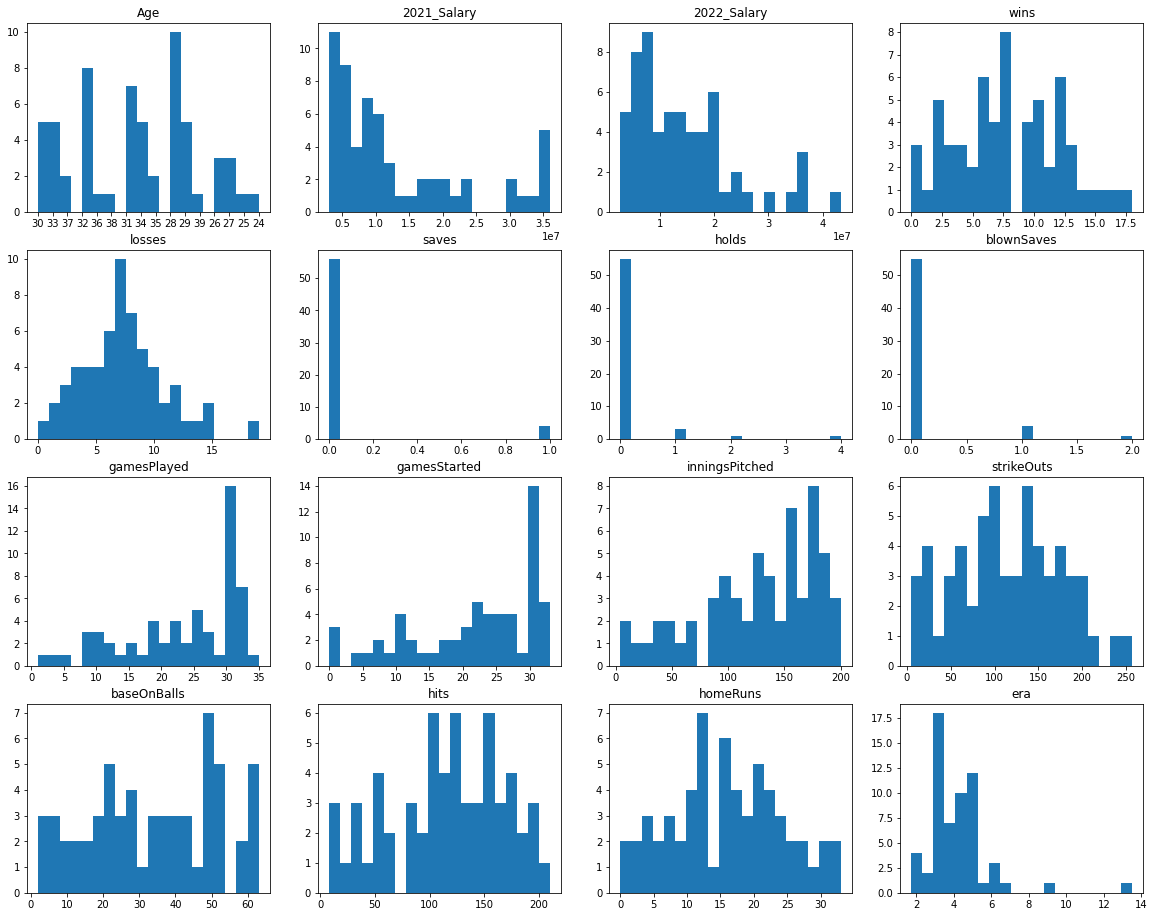

In [26]:
plot_hist_each_column(num_val)

### 위는 '선수명'이나 '포지션'과 같이 그래프로 표현할 수 없는 것들을 제외한 뒤, 모든 수치형 투수의 분포를 시각화한 것
### --> 몇몇 피처들이 매우 불균형한 분포를 가지고 있다는 것을 알 수 있게 해줌.
### 또한, 각 그래프마다 단위가 다름 -> 정규화와 스케일링 안 된 DATA

# 투수의 연봉 예측하기

#### -여러 가지 스케일링 방법 중 표준화 방법을 적용
#### -표준화? 정규분포에서 z-값을 구하는 과정과 동일
#### -z-값은 ((X)-(X의평균) / X의 표준편차
#### -단위 맞춰주기 = 피처 스케일링

In [27]:
# pandas 형태로 정의된 데이터를 출력 시, 과학적 표기법이 아닌 float 모양으로 출력되게 해준다.
pd.options.mode.chained_assignment = None

### 각각에 대한 scaling을 수행하는 함수 정의

In [28]:
def standard_scaling(pitcher, scale_columns):
    for col in scale_columns:
        series_mean = pitcher[col].mean()
        series_std = pitcher[col].std()
        pitcher[col] = pitcher[col].apply(lambda x: (x-series_mean)/series_std)
    return pitcher

### scaling을 수행 후의 DF

In [29]:
scale_columns = ['2021_Salary', '2022_Salary', 'wins', 'losses', 'saves', 'holds', 'blownSaves', 'gamesPlayed',
                 'gamesStarted', 'inningsPitched', 'strikeOuts', 'baseOnBalls', 'hits', 'homeRuns', 'era']
pitcher_df = standard_scaling(pitcher, scale_columns)
pitcher_df = pitcher_df.rename(columns={'2022_Salary': 'y'})
pitcher_df.head(10)

,Name,Pos,Age,2021_Salary,y,wins,losses,saves,holds,blownSaves,gamesPlayed,gamesStarted,inningsPitched,strikeOuts,baseOnBalls,hits,homeRuns,era
1,Gerrit Cole,SP,30,2.235794,2.280759,1.183878,0.189914,-0.265025,-0.247621,-0.282365,1.101336,1.183658,1.403023,2.338862,0.919004,0.723400,2.053672,-0.449490
2,Jacob deGrom,SP,33,2.235794,2.280759,-0.643329,-0.870070,-0.265025,-0.247621,-0.282365,-1.405153,-1.137930,-1.198377,-0.225861,-1.490871,-1.431677,-0.831487,-0.690750
3,Zack Greinke,SP,37,2.137722,-0.163065,-0.871730,0.454909,-0.265025,-0.247621,-0.282365,0.303817,0.444971,0.195025,-0.705712,-0.400689,0.780113,-0.230412,-0.346093
4,Stephen Strasburg,SP,32,2.137722,2.174505,-1.785334,-1.665057,-0.265025,-0.247621,-0.282365,-2.544466,-2.193197,-2.343299,-1.830881,-1.835138,-2.036611,-1.793206,5.294789
5,Max Scherzer,SP,36,2.098834,3.059949,0.727076,-0.605074,-0.265025,-0.247621,-0.282365,-0.037977,0.128391,0.349848,0.948948,-0.572823,-0.146192,-0.350627,-1.144548
6,Justin Verlander,SP,38,1.941578,1.111973,2.325883,-0.870070,-0.265025,-0.247621,-0.282365,0.531680,0.656025,0.921353,1.147507,-0.285933,0.005041,-0.470842,-1.454739
7,Trevor Bauer,SP,30,1.778125,2.209923,0.955477,-1.135065,-0.265025,-0.247621,-0.282365,-0.151908,0.022864,-0.013316,0.353270,-0.630201,-0.373043,-0.711272,-1.150292
8,Clayton Kershaw,SP,33,1.745434,0.293824,-0.414928,3.104867,-0.265025,-0.247621,-0.282365,0.873473,0.972605,0.485556,0.204351,0.861626,1.782035,1.332382,1.164653
9,Chris Sale,SP,32,1.647363,1.643239,1.869081,0.189914,-0.265025,-0.247621,-0.282365,0.759542,0.867078,1.288340,1.346066,0.173090,0.609975,0.731308,-0.679261
10,Patrick Corbin,SP,31,1.099795,0.943739,0.955477,-0.075082,-0.265025,-0.247621,-0.282365,0.303817,0.444971,0.500848,0.783482,0.000956,0.175179,-0.350627,-0.840101


In [33]:
Pos_encoding = pd.get_dummies(pitcher_df['Pos'])

# pitcher_df = pitcher_df.drop('Pos', axis=1)
pitcher_df.drop('Pos', axis=1)

pitcher_df = pitcher_df.join(Pos_encoding)
Pos_encoding.head(5)

,SP
1,1
2,1
3,1
4,1
5,1


### 끝에 포지션인 SP가 열명으로 들어가고 1로 되어있는 것을 확인할 수 있음

In [34]:
pitcher_df.head()

,Name,Age,2021_Salary,y,wins,losses,saves,holds,blownSaves,gamesPlayed,gamesStarted,inningsPitched,strikeOuts,baseOnBalls,hits,homeRuns,era,SP
1,Gerrit Cole,30,2.235794,2.280759,1.183878,0.189914,-0.265025,-0.247621,-0.282365,1.101336,1.183658,1.403023,2.338862,0.919004,0.723400,2.053672,-0.449490,1
2,Jacob deGrom,33,2.235794,2.280759,-0.643329,-0.870070,-0.265025,-0.247621,-0.282365,-1.405153,-1.137930,-1.198377,-0.225861,-1.490871,-1.431677,-0.831487,-0.690750,1
3,Zack Greinke,37,2.137722,-0.163065,-0.871730,0.454909,-0.265025,-0.247621,-0.282365,0.303817,0.444971,0.195025,-0.705712,-0.400689,0.780113,-0.230412,-0.346093,1
4,Stephen Strasburg,32,2.137722,2.174505,-1.785334,-1.665057,-0.265025,-0.247621,-0.282365,-2.544466,-2.193197,-2.343299,-1.830881,-1.835138,-2.036611,-1.793206,5.294789,1
5,Max Scherzer,36,2.098834,3.059949,0.727076,-0.605074,-0.265025,-0.247621,-0.282365,-0.037977,0.128391,0.349848,0.948948,-0.572823,-0.146192,-0.350627,-1.144548,1


## 회귀 분석 모델 학습 준비 : 학습 데이터셋 & 테스트 데이터셋 분리 필요
### Python sklearn의 train_test_split() 함수 이용

In [36]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
pitcher_df = pitcher_df.astype({"Age" : "float",
                          "SP" : "float"})

# 회귀 분석을 위한 학습, 테스트 데이터셋 분리
X = pitcher_df[pitcher_df.columns.difference(['Name', 'y'])]
y = pitcher_df['y']
X_train, X_test, y_train, y_test, = train_test_split(X, y, test_size=0.2, random_state=19)

# sklearn 라이브러리의 LinearRegression()으로 모델 오브젝트를 선언한 뒤,
# 해당 오브젝트에 model=lr.fit(X_train, y_train) 코드를 실행 -> 학습이 완료된 회귀식의 계수를 출력

# 회귀 분석 계수 학습 (회귀 모델 학습)
lr = linear_model.LinearRegression()
model = lr.fit(X_train, y_train)

# 학습된 계수를 출력
print(lr.coef_)

[ 9.00689513e-01 -6.70729758e-02  3.74700271e-16  1.55818290e-01
 -4.16956352e-03  7.16439999e-02 -1.60601291e-01 -2.37110736e-01
 -2.09896649e-02  4.74348071e-02  3.37206507e-01 -4.33952696e-02
 -1.81467467e-01 -3.69349821e-03  4.34222134e-02  2.51725182e-01]


In [37]:
import statsmodels.api as sm

# statsmodel library로 회귀 분석을 수행
X_train = sm.add_constant(X_train)
model = sm.OLS(y_trfain, X_train).fit()
model.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.748
Model:                            OLS   Adj. R-squared:                  0.631
Method:                 Least Squares   F-statistic:                     6.348
Date:                Tue, 08 Nov 2022   Prob (F-statistic):           6.11e-06
Time:                        04:53:06   Log-Likelihood:                -35.678
No. Observations:                  48   AIC:                             103.4
Df Residuals:                      32   BIC:                             133.3
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
2021_Salary        0.9007      0.141      6.382      0.000       0.613       1.188
Age               -0.0671      0.045     -1.500      0.143      -0.158       0.024
SP                 2.0212      1.377      1.468      0.152      -0.783       4.826
baseOnBalls        0.1558      0.212      0.734      0.468      -0.276       0.588
blownSaves        -0.0042      0.186     -0.022      0.982      -0.382       0.374
era                0.0716      0.132      0.543      0.591      -0.197       0.340
gamesPlayed       -0.1606      1.114     -0.144      0.886      -2.430       2.108
gamesStarted      -0.2371      1.084     -0.219      0.828      -2.446       1.972
hits              -0.0210      0.454     -0.046      0.963      -0.947       0.905
holds              0.0474      0.309      0.154      0.879      -0.581       0.676
homeRuns           0.3372      0.201      1.681      0.102      -0.071       0.746
inningsPitched    -0.0434      0.282     -0.154      0.879      -0.618       0.531
losses            -0.1815      0.189     -0.961      0.344      -0.566       0.203
saves             -0.0037      0.324     -0.011      0.991      -0.665       0.657
strikeOuts         0.0434      0.276      0.157      0.876      -0.518       0.605
wins               0.2517      0.233      1.082      0.287      -0.222       0.726
==============================================================================
Omnibus:                        2.219   Durbin-Watson:                   1.630
Prob(Omnibus):                  0.330   Jarque-Bera (JB):                1.288
Skew:                           0.278   Prob(JB):                        0.525
Kurtosis:                       3.579   Cond. No.                         566.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 결정 계수(R-squared), 수정 결정 계수(Adj, R-squared)가
### 1에 가까울수록 데이터를 잘 설명하는 모델

### 일반적으로 P-value가 0.05 이하면 'F 통계량이 유의한 의미를 가진다'고 함.


## 어떤 요소가 연봉에 강하게 영향을 미칠까?

[Text(0, 0, '2021_Salary'),
 Text(0, 0, 'Age'),
 Text(0, 0, 'SP'),
 Text(0, 0, 'baseOnBalls'),
 Text(0, 0, 'blownSaves'),
 Text(0, 0, 'era'),
 Text(0, 0, 'gamesPlayed'),
 Text(0, 0, 'gamesStarted'),
 Text(0, 0, 'hits'),
 Text(0, 0, 'holds'),
 Text(0, 0, 'homeRuns'),
 Text(0, 0, 'inningsPitched'),
 Text(0, 0, 'losses'),
 Text(0, 0, 'saves'),
 Text(0, 0, 'strikeOuts'),
 Text(0, 0, 'wins')]

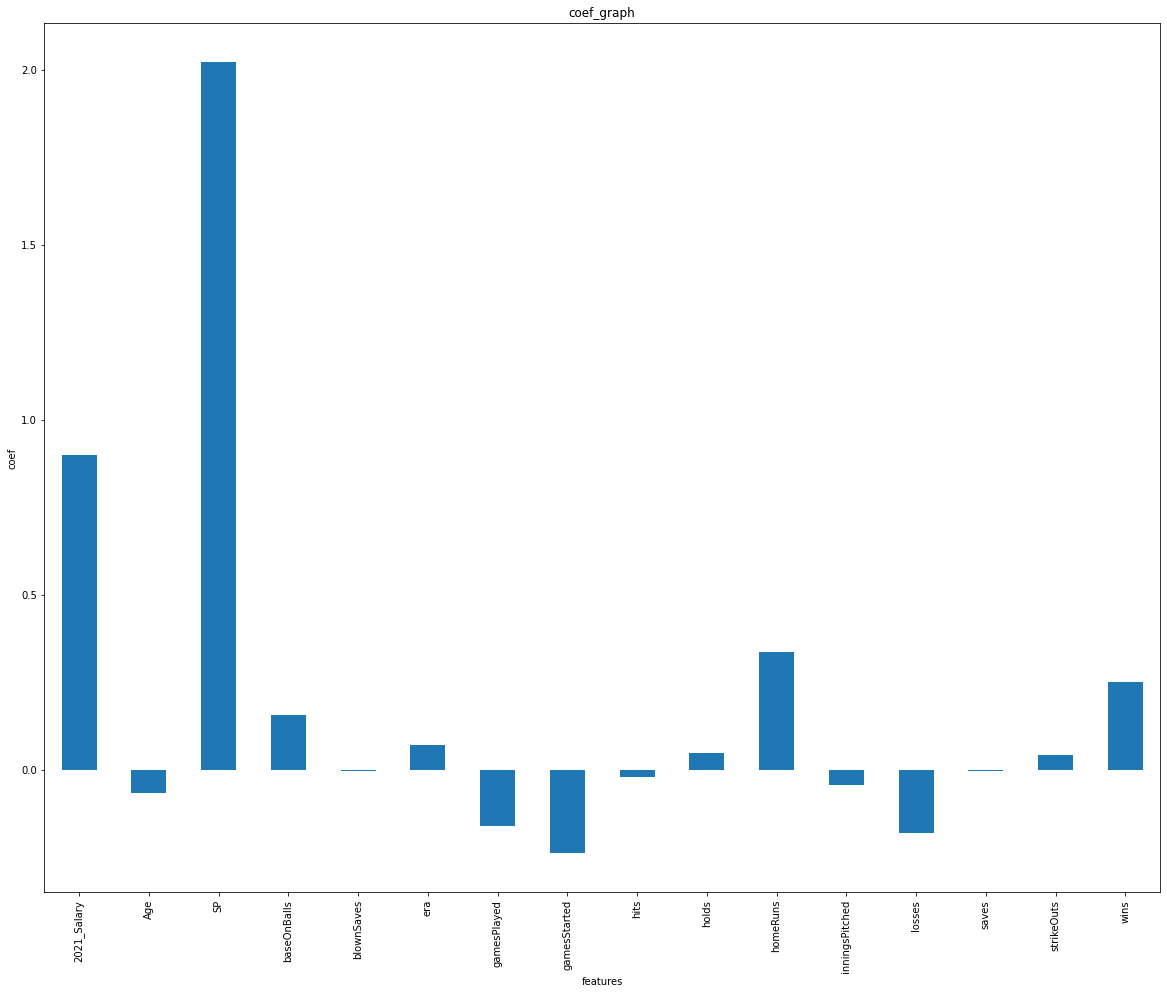

In [38]:
# 회귀 계수를 리스트로 반환
coefs = model.params.tolist()
coefs_series = pd.Series(coefs)

# 변수명을 리스트로 반환
x_labels = model.params.index.tolist()

# 회귀 계수 출력
ax = coefs_series.plot(kind='bar')
ax.set_title('coef_graph')
ax.set_xlabel('features')
ax.set_ylabel('coef')
ax.set_xticklabels(x_labels)

## 위 코드의 시각화 결과
### 2021_Salary, SP, gamesPlayed, gamesStarted, homeRuns, losses,wins 정도의
### 요소가 영향력이 큰 것으로 보임.

### sklearn LinearRegression 클래스로 출력해보자

In [39]:
# 학습 데이터와 테스트 데이터로 분리한다.
X= pitcher_df[pitcher_df.columns.difference(['Name', 'y'])]
y = pitcher_df['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=19)

# 회귀 분석 모델을 학습하자
lr = linear_model.LinearRegression()
model = lr.fit(X_train, y_train)

# 회귀 분석 모델을 평가한다.
print(model.score(X_train, y_train)) # train R2 score를 출력
print(model.score(X_test, y_test)) # test R2 score를 출력

0.748474525512393
0.5839550538843975


In [40]:
pitcher_df.rename(columns={"y" : "2022_Salary"}, inplace = True)

### 두 점수는 최대한 벌어지지 않는 것이 좋음
### train score > test score : 과적합
###    비유) 모의고사에만 특화된 공부를 한 나머지, 실제 시험의 새로운 유형에 적응하지 못하는 경우

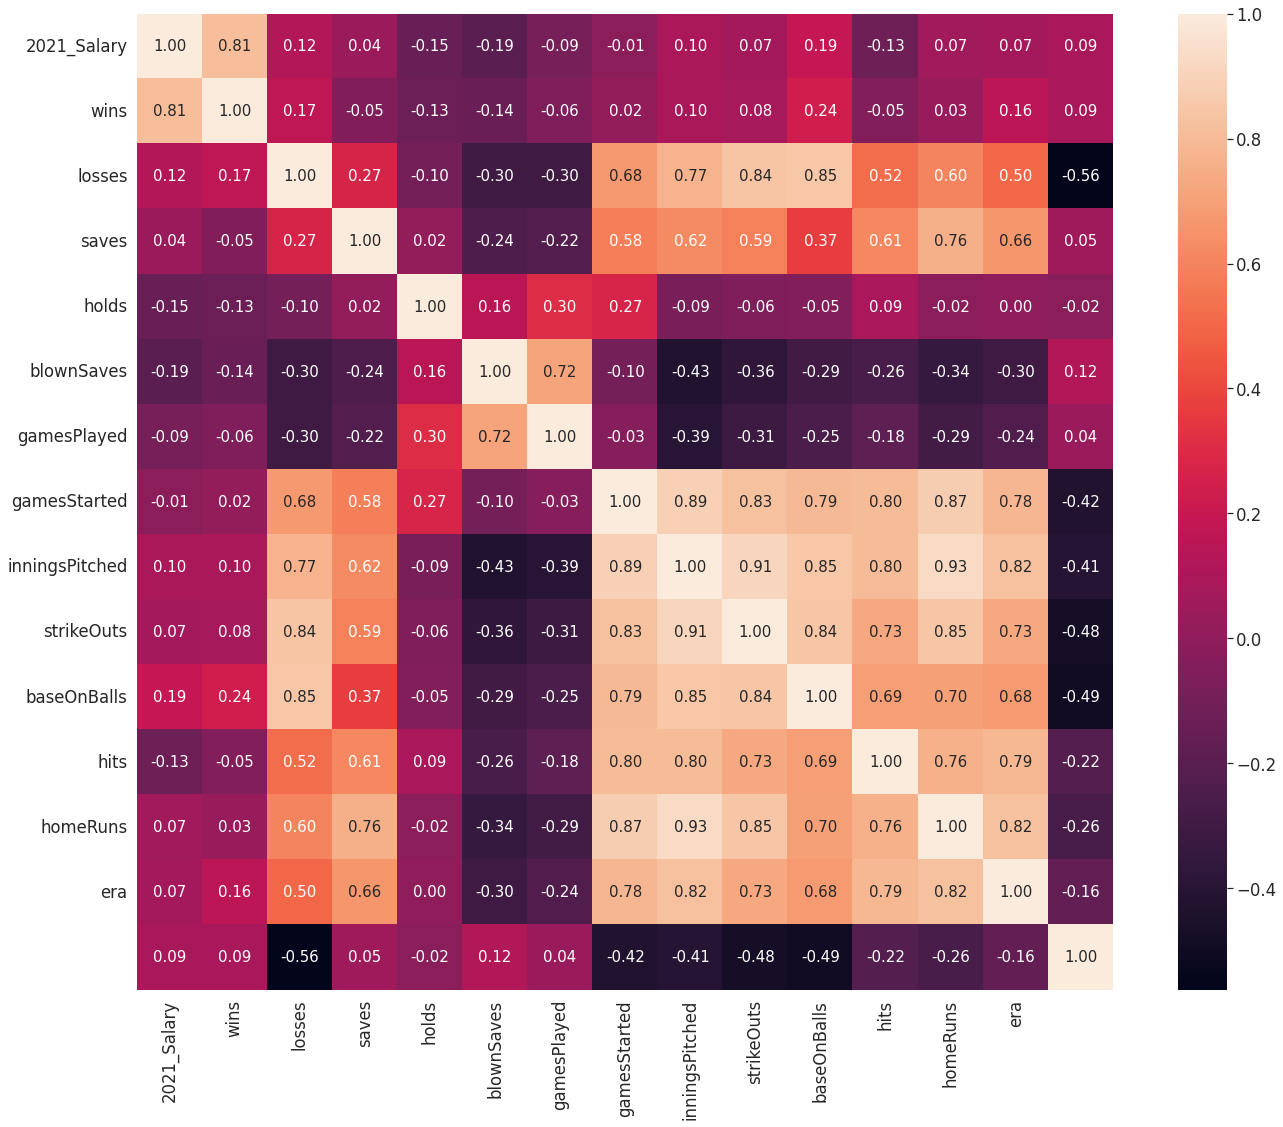

In [41]:
# 요소들의 상관 관계 확인을 위해 heatmap 방식의 시각화

import seaborn as sns

# 요소간의 상관계수 행렬을 계산
corr = pitcher_df[scale_columns].corr(method='pearson')
show_cols = ['2021_Salary', 'wins', 'losses', 'saves', 'holds', 'blownSaves', 'gamesPlayed',
                 'gamesStarted', 'inningsPitched', 'strikeOuts', 'baseOnBalls', 'hits', 'homeRuns', 'era']

# corr 행렬 히트맵을 시각화
plt.rc('font', family='NanumGothicOTF')
sns.set(font_scale=1.5)
hm = sns.heatmap(corr.values,
            cbar=True,
            annot=True, 
            square=True,
            fmt='.2f',
            annot_kws={'size': 15},
            yticklabels=show_cols,
            xticklabels=show_cols)

plt.tight_layout()
plt.show()

# 2021_Salary - wins
# losses - baseOnBalls
# inningsPitched - strikeOuts
### 등의 요소 쌍에서 높은 연관성을 발견할 수 있다.

### 회귀 분석의 전제 : 독립성
####     -->올바른 회귀 분석을 위해 요소 쌍 제거 필요 --> 다중 공선성 확인

#### *다중 공선성 : 변수 간 상관 관계가 높아 분석에 부정적인 영향을 미치는 것
    
#### 다중 공선성은 분산팽창요인(Variance Inflation Factor)이라는 계수로 평가 가능
#### VIF 계수가 10~15 정도가 넘음년 다중 공선성의 문제가 발생한 것으로 판단

In [42]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# 피처마다의 VIF 계수를 출력
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif.round(1)

,VIF Factor,features
0,2.0,2021_Salary
1,1.9,Age
2,168.4,SP
3,5.2,baseOnBalls
4,4.9,blownSaves
5,2.2,era
6,138.2,gamesPlayed
7,141.7,gamesStarted
8,21.7,hits
9,8.0,holds


## 적절한 요소 선정 후 다시 진행해보기
### 1. VIF 계수가 높은 요소들 우선적 제거
### 2. 다시 공선성 검증 -> 이전 단계에서 VIF 계수가 높았던 것들이 낮아진 것을 확인할 수 있음
#### ex) 2021_salary : 2.0 -> 1.5, wins : 7.4 -> 6.5 등으로

In [44]:
# 피처를 재선정
X = pitcher_df[['2021_Salary', 'wins', 'losses', 'saves', 'holds', 'blownSaves',
                  'inningsPitched', 'strikeOuts', 'baseOnBalls', 'hits', 'homeRuns', 'era']]
y = pitcher_df['2022_Salary']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=19)

# 모델을 학습
lr = linear_model.LinearRegression()
model = lr.fit(X_train, y_train)

# 결과 출력
print(model.score(X_train, y_train)) # train R2 score를 출력
print(model.score(X_test, y_test)) # test R2 score를 출력
# 피처마다의 VIF 계수를 출력
X = pitcher_df[['2021_Salary', 'wins', 'losses', 'saves', 'holds', 'blownSaves',
                  'inningsPitched', 'strikeOuts', 'baseOnBalls', 'hits', 'homeRuns', 'era']]
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif.round(1)

0.7244382008738579
0.7473651257706118


,VIF Factor,features
0,1.5,2021_Salary
1,6.5,wins
2,3.3,losses
3,1.2,saves
4,2.4,holds
5,2.5,blownSaves
6,10.6,inningsPitched
7,7.2,strikeOuts
8,4.4,baseOnBalls
9,7.0,hits


# 남은 것들로 다시한번 회귀분석 실행

# 분석 결과 시각화

In [45]:
# 2022년 연봉을 예측하여 데이터프레임의 column으로 생성
X = pitcher_df[['2021_Salary', 'wins', 'losses', 'saves', 'holds', 'blownSaves',
                  'inningsPitched', 'strikeOuts', 'baseOnBalls', 'hits', 'homeRuns', 'era']]
predict_2022_Salary = lr.predict(X)
pitcher_df['predict_2022_Salary'] = pd.Series(predict_2022_Salary)

In [49]:
# 원래의 데이터 프레임을 다시 로드
# original_df = pd.read_csv('/content/original_df.csv')
# original_df = original_df[['Name', '2021_Salary']]

this_df = this_df[['Name', '2021_Salary']]

# 원래의 데이터 프레임에 2022년 연봉 정보를 합친다.
result_df = pitcher_df.sort_values(by=['2022_Salary'], ascending=False)
result_df.drop(['2021_Salary'], axis=1, inplace=True, errors='ignore')
result_df = result_df.merge(this_df, on=['Name'], how='left')
result_df = result_df[['Name', '2022_Salary', 'predict_2022_Salary', '2021_Salary']]
result_df.columns = ['Name', '2022_Salary', 'predict_2022_Salary', '2021_Salary']

# 재계약하여 연봉이 변화한 선수만을 대상으로 관찰
result_df = result_df[result_df['2021_Salary'] != result_df['2022_Salary']]
result_df = result_df.reset_index()
result_df = result_df.iloc[:10, :]
result_df.head(10)

,index,Name,2022_Salary,predict_2022_Salary,2021_Salary
0,0,Max Scherzer,3.059949,1.615391,2.098834
1,1,Gerrit Cole,2.280759,1.674674,2.235794
2,2,Jacob deGrom,2.280759,0.936970,2.235794
3,3,Trevor Bauer,2.209923,0.833847,1.778125
4,4,Stephen Strasburg,2.174505,1.567882,2.137722
5,5,Chris Sale,1.643239,0.715057,1.647363
6,6,Zack Wheeler,1.218227,0.131388,0.911824
7,7,Justin Verlander,1.111973,1.347700,1.941578
8,8,Patrick Corbin,0.943739,0.282151,1.099795
9,9,Madison Bumgarner,0.899467,0.983679,0.568573


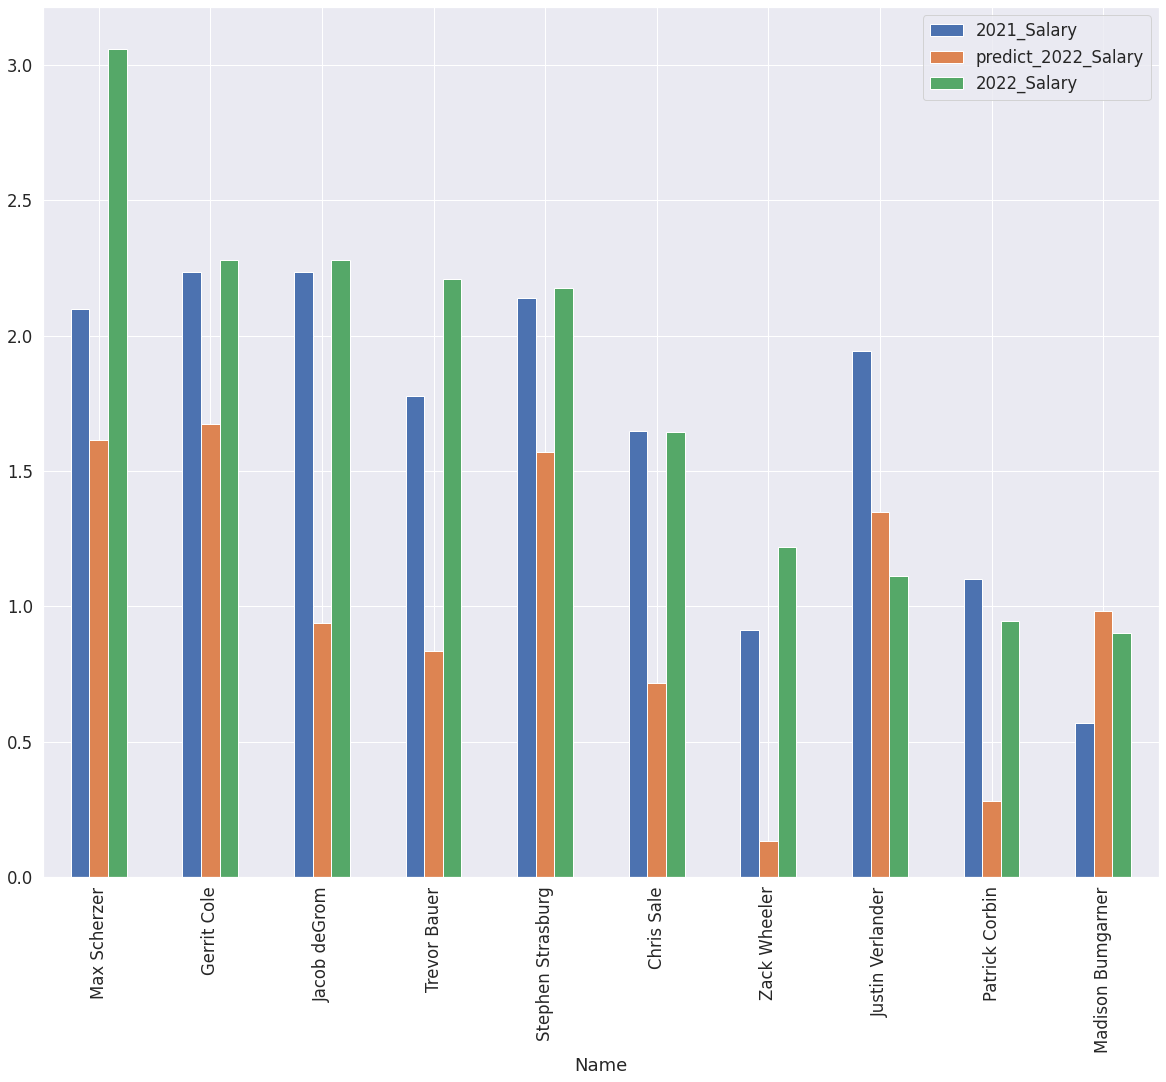

In [50]:
_# 선수별 연봉 정보(작년연봉, 예측연봉, 실제연봉)를 막대 그래프로 출력한다.
result_df.plot(x='Name', y=['2021_Salary', 'predict_2022_Salary', '2022_Salary'],
              kind="bar")

# 결론

# >깨달은 점
## -직접 Crawling -> EDA -> ML -> Visualization을 데이터 처리가 어떻게 이루어지는지 알게 됨.
## -우리가 모르는 값을 미리 예측하게 할수 있게 함으로써 활용할 수 있는 분야가 넓음

# >보완할 점
## -어떤 요인이 정확하게 연봉에 영향을 미치는지 확실하게 알아야할 필요가 있음 -> 결과에 영향
## -조금 더 많은 데이터를 다루면 조금 더 정확한 예측이 가능하지 않았을까?

